In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt
import sys
import os

# Exploratory Data Analysis (EDA) 

In [2]:
data = ['CA','GB','US']
sys.path.insert(0, os.path.abspath('../submitted'))
from scripts import project_functions # This is called a relative import
df_lastdate = project_functions.load_and_process(data)

In [3]:
from scripts import project_functions # This is called a relative import
df_assign = project_functions.log(df_lastdate)

C:\Users\skate\miniconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


*In the dataset, a video_id has one publish date and mutiple trending dates.
I would like to keep each video to have only one record so that we can define which types of video is most popular.*

In [7]:
profiling = pandas_profiling.ProfileReport(df_clean)
profiling

# Heatmap for Major Trending Stats

<AxesSubplot:>

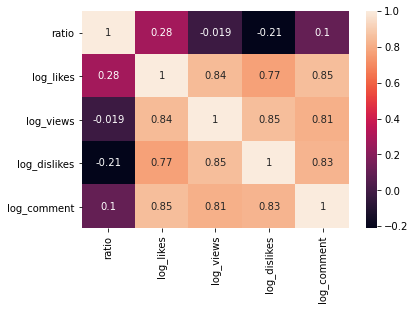

In [4]:
sns.heatmap(df_assign.corr(), annot = True)

# Pair Plot for Major Trending Stats

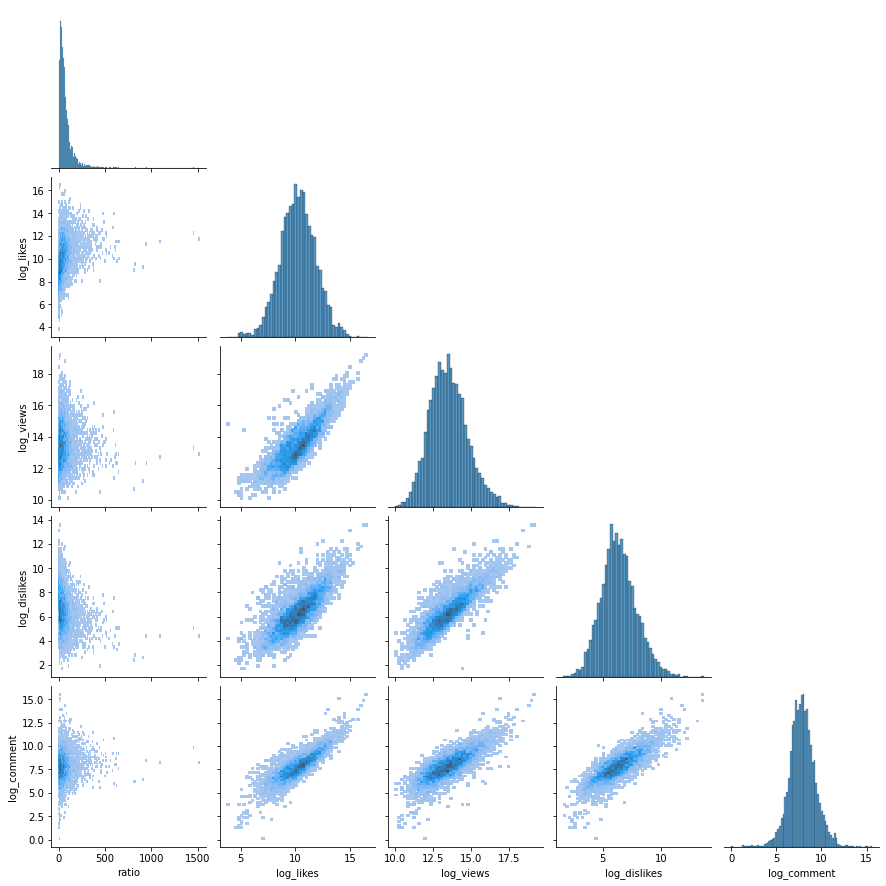

In [5]:
sns.pairplot(df_assign, corner=True, kind="hist")

# Logged lmplot for log_likes against log_views

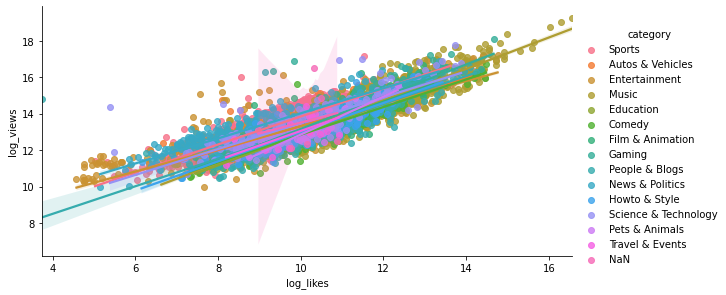

In [6]:
sns.lmplot(x="log_likes", y="log_views",hue="category", data=df_assign, height=4, aspect=2, palette="husl")

# Logged Violin Plot for likes against category

<AxesSubplot:xlabel='log_likes', ylabel='category'>

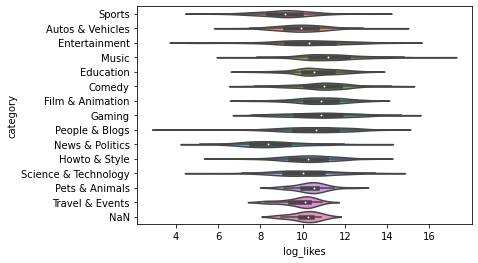

In [7]:
sns.violinplot(x="log_likes", y="category", data=df_assign)

In [ ]:
# load into single
df = pd.concat([pd.read_csv(pathCA),
                pd.read_csv(pathGB),
                pd.read_csv(pathUS)])

#change the datetime
df["trending_date"] = df.apply(lambda row: pd.to_datetime(row["trending_date"]), axis=1)
df["publishedAt"] = df.apply(lambda row: pd.to_datetime(row["publishedAt"]), axis=1)

#category ID dictionary
category_replace = {
      1:'Film & Animation',
      2:'Autos & Vehicles',
      10:'Music',
      15:'Pets & Animals',
      17:'Sports',
      19:'Travel & Events', 
      20:'Gaming',
      21:'Videoblogging',
      22: "People & Blogs",
      23: "Comedy", 
      24: "Entertainment",
      25: "News & Politics", 
      26: "Howto & Style", 
      27: "Education", 
      28: "Science & Technology",
      29: 'NaN'
    }

#clean the dataset
df_clean = df.drop(columns = ['thumbnail_link','comments_disabled','ratings_disabled','description','title','channelId'])
df_clean = df_clean.replace({"categoryId":category_replace}).rename(columns= {'categoryId':'category'})
df_clean = df_clean.drop(df_clean[df_clean['category']=='NaN'].index).sort_values('trending_date')
df_clean = df_clean.reset_index().drop(columns = ['index'])

#drop the duplicate video and keep the video with the last trending_date
#df_lastdate = df_clean[df_clean['video_id']=='KX06ksuS6Xo']
df_lastdate = df_clean.drop_duplicates(['video_id'], keep='last').reset_index().drop(columns = 'index')

